In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
with open('/content/train_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [ ]:
for language_pair, language_data in data.items():
  print(f"Language Pair: {language_pair}")


Language Pair: English-Bengali
Language Pair: English-Hindi


In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                target_sentences_val.append(target)
                id_val.append(entry_id)
              else:
                source_sentences_train.append(source)
                target_sentences_train.append(target)
                id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Train


In [ ]:
with open('/content/test_data1_final (1).json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [ ]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              #target = entry_data["target"]
              if (data_type == "Test"):
                source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Test


In [ ]:
print(len(source_sentences_train))
print(len(target_sentences_train))

print(len(source_sentences_val))
print(len(target_sentences_val))

68849
68849
19672
0


In [ ]:
x={'English':source_sentences_train,'Hindi':target_sentences_train}

In [ ]:
df=pd.DataFrame(x)

In [ ]:

df

,English,Hindi
0,Do not forget to visit the point where the Nar...,এই জায়গাগুলো দেখতে ভুলো না যেখানে নর্মদা নদী ম...
1,It is evident that the biggest cause of povert...,এই কথা স্পষ্ট যে দরিদ্রতার বড় কারণ হল অশিক্ষা ।
2,The film was released theatrically on 12 April...,চলচ্চিত্রটি ২০১৩ সালের ১২ই এপ্রিল প্রেক্ষাগৃহে...
3,is wyatt's birthday party at ten p. m.,অনিমেষ এর জন্মদিনের পার্টি রাত দশটায়
4,"Apart from being used as an eatable, barley is...",খাদ্যদ্রব্য ছাড়াও যব আরো বিভিন্ন ক্ষেত্রে যেমন...
...,...,...
68844,But it is evident that there is change in both...,তাও এটা প্রত্যক্ষভাবে দেখা যায় যে প্রিন্ট মিড...
68845,Include a detailed listing of all of your prod...,ছবি সহ সম্পূর্ণ করা আপনার সমস্ত পণ্যের একটি বি...
68846,"Each subcategory counts as one page, pages in ...",প্রতিটি উপবিভাগ একটি পৃষ্ঠা হিসাবে গণনা করা হয...
68847,It is one of the country's oldest state-run pu...,এটি দেশের সবচেয়ে পুরনো রাষ্ট্র-চালিত সরকারী বা...


In [ ]:
import nltk
from collections import Counter

In [ ]:
# Function to preprocess and remove punctuation and numbers
def preprocess_and_remove_punctuation(sentence):
    # Remove punctuation and numbers
    sentence = ''.join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
    return sentence

In [ ]:
# Tokenization and Lowercasing
def preprocess(sentences):
    tokenized_sentences = [nltk.word_tokenize(preprocess_and_remove_punctuation(sentence.lower())) for sentence in sentences]
    return tokenized_sentences

In [ ]:
target_sentences_train = [re.sub(r'[a-zA-Z]','',hi) for hi in target_sentences_train] #optional

In [ ]:
english_tokens = preprocess(source_sentences_train)
english_test=preprocess(source_sentences_val)
hindi_tokens = preprocess(target_sentences_train)
hindi_test=preprocess(target_sentences_val)

In [ ]:
en_train=english_tokens
en_test=english_test
de_train=hindi_tokens
de_test=hindi_test

In [ ]:
en_index2word = ["<PAD>", "<SOS>", "<EOS>"]
de_index2word = ["<PAD>", "<SOS>", "<EOS>"]

for ds in [en_train, en_test]:
    for sent in ds:
        for token in sent:
            if token not in en_index2word:
                en_index2word.append(token)

for ds in [de_train, de_test]:
    for sent in ds:
        for token in sent:
            if token not in de_index2word:
                de_index2word.append(token)

In [ ]:
en_index2word

['<PAD>',
 '<SOS>',
 '<EOS>',
 'do',
 'not',
 'forget',
 'to',
 'visit',
 'the',
 'point',
 'where',
 'narmada',
 'flowing',
 'through',
 'marble',
 'rocks',
 'interchanges',
 'its',
 'calmness',
 'and',
 'serenity',
 'into',
 'insouciance',
 'it',
 'is',
 'evident',
 'that',
 'biggest',
 'cause',
 'of',
 'poverty',
 'illiteracy',
 'film',
 'was',
 'released',
 'theatrically',
 'on',
 'april',
 'wyatts',
 'birthday',
 'party',
 'at',
 'ten',
 'p',
 'm',
 'apart',
 'from',
 'being',
 'used',
 'as',
 'an',
 'eatable',
 'barley',
 'also',
 'in',
 'many',
 'other',
 'fields',
 'like',
 'industries',
 'agriculture',
 'emperor',
 'akbar',
 'got',
 'state',
 'museum',
 'constructed',
 'during',
 'his',
 'trip',
 'ajmer',
 'initiate',
 'music',
 'electronic',
 'playlist',
 'srinagar',
 'a',
 'distance',
 'kms',
 'jammu',
 'devotee',
 'chosen',
 'karaga',
 'or',
 'clay',
 'pot',
 'placed',
 'head',
 'city',
 'lined',
 'up',
 'with',
 'shops',
 'have',
 'everything',
 'you',
 'need',
 'stock',
 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
en_word2index = {token: idx for idx, token in enumerate(en_index2word)}
de_word2index = {token: idx for idx, token in enumerate(de_index2word)}

In [ ]:
len(en_word2index)

60963

In [ ]:
en_lengths = sum([len(sent) for sent in en_train])/len(en_train)
de_lengths = sum([len(sent) for sent in de_train])/len(de_train)

In [ ]:
seq_length = 20

In [ ]:
def encode_and_pad(vocab, sent, max_length):
    sos = [vocab["<SOS>"]]
    eos = [vocab["<EOS>"]]
    pad = [vocab["<PAD>"]]

    if len(sent) < max_length - 2: # -2 for SOS and EOS
        n_pads = max_length - 2 - len(sent)
        encoded = [vocab[w] for w in sent]
        return sos + encoded + eos + pad * n_pads
    else: # sent is longer than max_length; truncating
        encoded = [vocab[w] for w in sent]
        truncated = encoded[:max_length - 2]
        return sos + truncated + eos

In [ ]:
en_train_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_train]
en_test_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_test]
de_train_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_train]
de_test_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_test]

In [ ]:
en_train_encoded[1]

[1, 23, 24, 25, 26, 8, 27, 28, 29, 30, 24, 31, 2, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
batch_size = 50

train_x = np.array(en_train_encoded)
train_y = np.array(de_train_encoded)
test_x = np.array(en_test_encoded)
test_y = np.array(de_test_encoded)

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x))


train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
#test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
train_x[1]

array([ 1, 23, 24, 25, 26,  8, 27, 28, 29, 30, 24, 31,  2,  0,  0,  0,  0,
        0,  0,  0])

In [ ]:
train_ds[1]

(tensor([ 1, 23, 24, 25, 26,  8, 27, 28, 29, 30, 24, 31,  2,  0,  0,  0,  0,  0,
          0,  0]),
 tensor([ 1,  3, 26, 27, 28, 29, 30, 31, 32, 33, 34,  2,  0,  0,  0,  0,  0,  0,
          0,  0]))

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # Embedding layer
        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=0)

        # GRU layer. The input and output are both of the same size
        #  since embedding size = hidden size in this example
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)

    def forward(self, input, hidden):
        # The inputs are first transformed into embeddings
        embedded = self.embedding(input)
        output = embedded

        # As in any RNN, the new input and the previous hidden states are fed
        #  into the model at each time step
        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        # This method is used to create the innitial hidden states for the encoder
        return torch.zeros(1, batch_size, self.hidden_size)

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # Embedding layer
        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=0)

        # The GRU layer
        self.gru = nn.GRU(hidden_size, hidden_size)

        # Fully-connected layer for scores
        self.out = nn.Linear(hidden_size, output_size)

        # Applying Softmax to the scores
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # Feeding input through embedding layer
        output = self.embedding(input)

        # Applying an activation function (ReLu)
        output = F.relu(output)

        # Feeding input and previous hidden state
        output, hidden = self.gru(output, hidden)

        # Outputting scores from the final time-step
        output = self.softmax(self.out(output[0]))

        return output, hidden

    # We do not need an .initHidden() method for the decoder since the encoder output will act as input in the first decoder time-step

In [ ]:
hidden_size = 128


In [ ]:
seq_length = 20

In [ ]:
encoder = EncoderRNN(len(en_index2word), hidden_size).to(device)
decoder = DecoderRNN(hidden_size, len(de_index2word)).to(device)

In [ ]:
encoder

EncoderRNN(
  (embedding): Embedding(60963, 128, padding_idx=0)
  (gru): GRU(128, 128, batch_first=True)
)

In [ ]:
decoder

DecoderRNN(
  (embedding): Embedding(101703, 128, padding_idx=0)
  (gru): GRU(128, 128)
  (out): Linear(in_features=128, out_features=101703, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [ ]:
criterion = nn.NLLLoss()
enc_optimizer = torch.optim.Adam(encoder.parameters(), lr = 3e-3)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr = 3e-3)

In [ ]:
losses = []

In [ ]:
input_length = target_length = seq_length

SOS = en_word2index["<SOS>"]
EOS = en_word2index["<EOS>"]

epochs = 1

for epoch in range(epochs):
    for idx, batch in enumerate(train_dl):

        # Creating initial hidden states for the encoder
        encoder_hidden = encoder.initHidden()

        # Sending to device
        encoder_hidden = encoder_hidden.to(device)

        # Assigning the input and sending to device
        input_tensor = batch[0].to(device)

        # Assigning the output and sending to device
        target_tensor = batch[1].to(device)


        # Clearing gradients
        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        # Enabling gradient calculation
        with torch.set_grad_enabled(True):

            # Feeding batch into encoder
            encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)

            # This is a placeholder tensor for decoder outputs. We send it to device as well
            dec_result = torch.zeros(target_length, batch_size, len(de_index2word)).to(device)

            # Creating a batch of SOS tokens which will all be fed to the decoder
            decoder_input = target_tensor[:, 0].unsqueeze(dim=0).to(device)

            # Creating initial hidden states of the decoder by copying encoder hidden states
            decoder_hidden = encoder_hidden

            # For each time-step in decoding:
            for i in range(1, target_length):

                # Feed input and previous hidden states
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)

                # Finding the best scoring word
                best = decoder_output.argmax(1)

                # Assigning next input as current best word
                decoder_input = best.unsqueeze(dim=0)

                # Creating an entry in the placeholder output tensor
                dec_result[i] = decoder_output


            # Creating scores and targets for loss calculation
            scores = dec_result.transpose(1, 0)[1:].reshape(-1, dec_result.shape[2])
            targets = target_tensor[1:].reshape(-1)

            # Calculating loss
            loss = criterion(scores, targets)

            # Performing backprop and clipping excess gradients
            loss.backward()

            torch.nn.utils.clip_grad_norm_(encoder.parameters(), max_norm=1)
            torch.nn.utils.clip_grad_norm_(decoder.parameters(), max_norm=1)

            enc_optimizer.step()
            dec_optimizer.step()

            # Keeping track of loss
            losses.append(loss.item())
            if idx % 100 == 0:
                print(idx, sum(losses)/len(losses))

0 10.94308090209961
100 6.694977835853501
200 6.311511919866154
300 6.158519036746104
400 6.065484502369031
500 6.001953862622351
600 5.958125075564012
700 5.909827228279495
800 5.866197042548552
900 5.8274769338465955
1000 5.791986578827971
1100 5.75834059477069
1200 5.727123558670158
1300 5.701351170902707


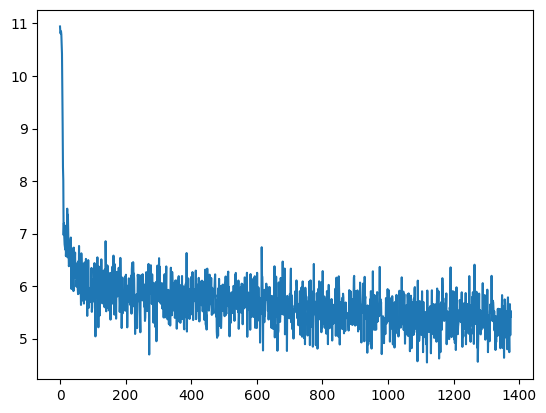

In [ ]:
plt.plot(losses)

In [ ]:
from tqdm import tqdm

In [ ]:
val_ids = [ i for i,_ in data["English-Bengali"]["Test"].items()]

In [ ]:
val_outs = []
for i in tqdm(range(len(test_ds))):
  encoder_hidden = torch.zeros(1, 1, hidden_size).to(device)
  input_tensor = test_ds[i][0].unsqueeze(dim=0).to(device)
  result = []
  with torch.set_grad_enabled(False):
    encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
    decoder_input = torch.tensor([SOS]).unsqueeze(dim=0).to(device)
    decoder_hidden = encoder_hidden
    for di in range(1, target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        best = decoder_output.argmax(1)
        result.append(de_index2word[best.to('cpu').item()])
        if best.item() == EOS:
            break

        decoder_input = best.unsqueeze(dim=0)
  result = [i for i in result if not i in ['<EOS>', '<PAD>', '<SOS>']]
  val_outs.append(" ".join(result))

100%|██████████| 19672/19672 [02:25<00:00, 134.90it/s]


In [ ]:
df0 = pd.DataFrame()
df0["ID"] = val_ids
df0["Translation"] = val_outs

In [ ]:
df0.to_csv('answersB.csv', index = False)

In [ ]:
x=pd.read_csv("/content/answersB.csv")

In [ ]:
x

# Do the above same thing for English-Bengali.

In [ ]:
df1 = pd.read_csv("/content/answersB.csv") # Bengali
df2= pd.read_csv("/content/answersH.csv")  # Hindi

In [ ]:
df3 = pd.concat([df1, df2]) #Concat

In [ ]:
df3

In [ ]:
df3.to_csv('answersBH.csv', index = False)

In [ ]:
filtered_data = pd.read_csv("/content/answersBH.csv")

In [ ]:
answer = "/content/answer.csv"
with open(answer, "w") as f:
  f.writelines("ID\tTranslation\n")
  for i in range(filtered_data.shape[0]):
    f.writelines(f'{filtered_data["ID"][i]}\t"{filtered_data["Translation"][i]}"\n')

### Make a zip file of answer.csv and save it as submission.zip and submit it